In [1]:
# Lets import all the packages we would require
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
%matplotlib inline

In [2]:
 employee= pd.read_csv("C:/Users/Woodrow/Downloads/employee_retention_data.csv")
employee.head(10)

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22
5,509529.0,4,data_science,14,165000.0,2012-01-30,2013-08-30
6,88600.0,4,customer_service,21,107000.0,2013-10-21,NaN
7,716309.0,2,customer_service,4,30000.0,2014-03-05,NaN
8,172999.0,9,engineer,7,160000.0,2012-12-10,2015-10-23
9,504159.0,1,sales,7,104000.0,2012-06-12,NaN


In [3]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24702 entries, 0 to 24701
Data columns (total 7 columns):
employee_id    24702 non-null float64
company_id     24702 non-null int64
dept           24702 non-null object
seniority      24702 non-null int64
salary         24702 non-null float64
join_date      24702 non-null object
quit_date      13510 non-null object
dtypes: float64(2), int64(2), object(3)
memory usage: 1.3+ MB


In [4]:
employee.isnull().sum()

employee_id        0
company_id         0
dept               0
seniority          0
salary             0
join_date          0
quit_date      11192
dtype: int64

In [5]:
#Remove all the null cases for the quit date as we require 

In [6]:
df = employee[employee['quit_date'].notna()]
df.head(5)

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22
5,509529.0,4,data_science,14,165000.0,2012-01-30,2013-08-30


In [7]:
 type(df['join_date'][0])


str

In [8]:
df['join_date'] = pd.to_datetime(df['join_date'], format='%Y-%m-%d',errors='coerce')
df['quit_date'] = pd.to_datetime(df['quit_date'], format='%Y-%m-%d',errors='coerce')

C:\Users\Woodrow\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Woodrow\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [9]:
df['diff_days'] = df['quit_date'] - df['join_date']
#df['diff_days']=df['diff_days']/np.timedelta64(1,'D')

C:\Users\Woodrow\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,diff_days
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,585 days
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,340 days
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,389 days
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1040 days
5,509529.0,4,data_science,14,165000.0,2012-01-30,2013-08-30,578 days


In [11]:
df.dept.value_counts()

customer_service    5094
engineer            2362
sales               1811
marketing           1783
data_science        1682
design               778
Name: dept, dtype: int64

In [12]:
df['day'] = list(map(lambda var: var.days,df['diff_days']))

C:\Users\Woodrow\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


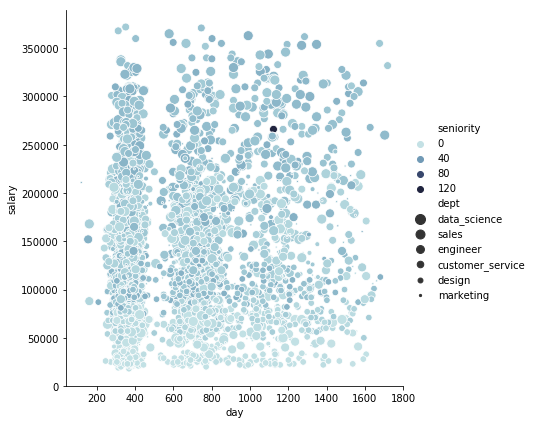

In [13]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
sns.relplot(x='day', y="salary", hue="seniority", size="dept",
            sizes=(5, 100), palette=cmap,
            height=6, data=df.sample(n=None, frac=0.3, replace=False, weights=None, random_state=10, axis=None))

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13510 entries, 0 to 24701
Data columns (total 9 columns):
employee_id    13510 non-null float64
company_id     13510 non-null int64
dept           13510 non-null object
seniority      13510 non-null int64
salary         13510 non-null float64
join_date      13510 non-null datetime64[ns]
quit_date      13510 non-null datetime64[ns]
diff_days      13510 non-null timedelta64[ns]
day            13510 non-null int64
dtypes: datetime64[ns](2), float64(2), int64(3), object(1), timedelta64[ns](1)
memory usage: 1.7+ MB


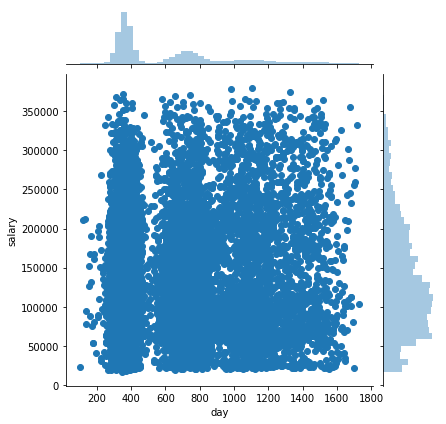

In [15]:
sns.jointplot(x='day',y='salary',data=df)

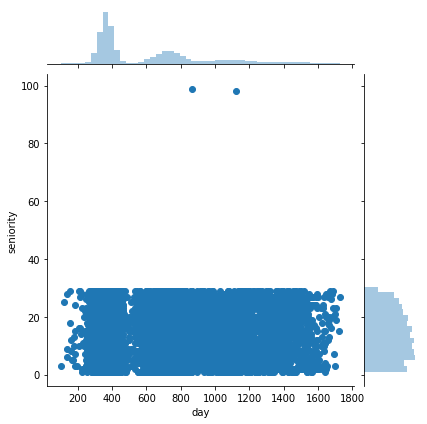

In [16]:
sns.jointplot(x='day',y='seniority',data=df)

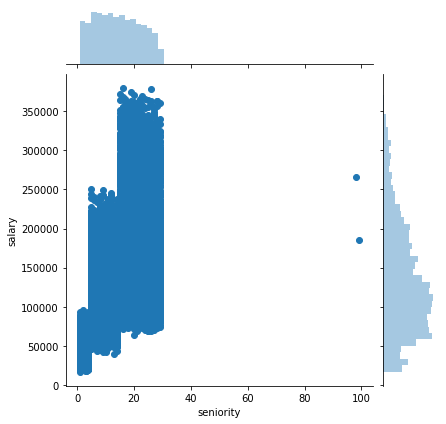

In [17]:
sns.jointplot(x='seniority',y='salary',data=df)

In [18]:
df['salary']=np.log(df['salary'])

C:\Users\Woodrow\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
df1 = pd.get_dummies(df,drop_first=True)
df1.drop(['quit_date','join_date','diff_days'],axis=1,inplace=True)


In [20]:
X = df1.drop('day',axis=1)
y = df1['day']

In [21]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

C:\Users\Woodrow\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lm = LinearRegression()

In [24]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [ 1.12287250e-05 -2.70612420e+00  1.21531510e+00 -1.83852748e+01
  6.85925892e+01  1.42939753e+01  6.63669292e+01  9.88441079e+00
 -4.81308550e+00]


In [26]:
predictions = lm.predict( X_test)

Text(0,0.5,'Predicted Y')

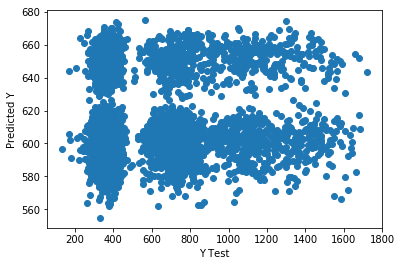

In [27]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [28]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 270.1264808496829
MSE: 105062.47498802854
RMSE: 324.133421584428


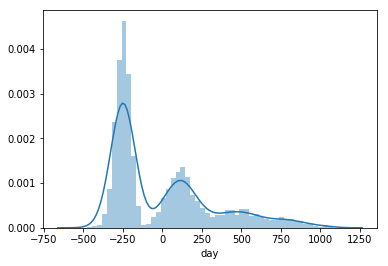

In [29]:
sns.distplot((y_test-predictions),bins=50);

In [30]:
qgrid

NameError: name 'qgrid' is not defined